In [85]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil
import re
#import pandas
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error



import tensorflow as tf

from tensorflow.keras import layers
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)


In [9]:
##Leemos el fichero y obtenemos los caracteres diferentes
def cogerCaracteres(fichero, listaCaracteres=[]):
    #configurara lista
    for i,c in enumerate(listaCaracteres):
        listaCaracteres[i]={"caracter":c,"ord":ord(c)}
    with open(fichero,mode="r",encoding="utf8") as fichero:
        for linea in fichero:
            for c in linea:
                o=ord(c)
                if(o<256 and o!=13):
                    car={"caracter":c,"ord":o}
                    if(not car in listaCaracteres):
                        listaCaracteres.append(car)
    VOCABULARIO=len(listaCaracteres)
    return listaCaracteres

In [11]:
caracteres=cogerCaracteres("textos/dialogo.txt",[' ', '\n', 'L', 'a', 'R', 'e', 'g', 'n', 't', 'p', 'o', 'r', 'l', 'd', 'A', 's', '«', 'C', 'í', '»', 'i', 'b', 'F', 'é', ',', 'M', '1', '9', '0', '.', 'P', 'ó', 'q', 'u', 'f', 'W', 'j', '_', 'm', 'h', 'v', 'á', 'c', 'y', ';', 'T', 'E', 'z', 'x', 'S', 'ñ', ':', 'ú', '(', ')', 'H', 'N', 'D', 'Y', 'k', 'Q', 'J', 'V', 'I', '¡', '!', 'O', 'G', 'B', '-', 'Á', '¿', "'", '?', 'U', 'É', 'ü', 'w', 'º', '2', '3', '4', 'Í', 'Z', 'ï', 'Ú', 'K', 'X', 'Ó', 'è', '8', '6', '7', 'ö', '+', '5', 'ç', '*', 'à', '/', '"', '%', '@', '$'])
print(len(caracteres))


104


In [12]:
caracteres=[' ','\n']
#for c in listaCaracteres:
#    if(not c['caracter'] in caracteres):
#        caracteres.append(c['caracter'])
#
#print(caracteres)
caracteres=[' ', '\n', 'L', 'a', 'R', 'e', 'g', 'n', 't', 'p', 'o', 'r', 'l', 'd', 'A', 's', '«', 'C', 'í', '»', 'i', 'b', 'F', 'é', ',', 'M', '1', '9', '0', '.', 'P', 'ó', 'q', 'u', 'f', 'W', 'j', '_', 'm', 'h', 'v', 'á', 'c', 'y', ';', 'T', 'E', 'z', 'x', 'S', 'ñ', ':', 'ú', '(', ')', 'H', 'N', 'D', 'Y', 'k', 'Q', 'J', 'V', 'I', '¡', '!', 'O', 'G', 'B', '-', 'Á', '¿', "'", '?', 'U', 'É', 'ü', 'w', 'º', '2', '3', '4', 'Í', 'Z', 'ï', 'Ú', 'K', 'X', 'Ó', 'è', '8', '6', '7', 'ö', '+', '5', 'ç', '*', 'à', '/', '"', '%', '@', '$']
np.random.seed(7)


In [13]:
VOCABULARIO=len(caracteres)
print(VOCABULARIO)
LONGITUD=128
FICHERO_PESOS="modelos/pesosRNNConversacion.hdf5"

104


In [149]:
#Genera una salida con frases texto - respuesta
def transformarConversacion(fichero):
    textoAEntrenar=""
    with open(fichero,mode="r",encoding="utf8") as fichero:
        for linea in fichero:
            for c in linea:
                if(c in caracteres):
                    textoAEntrenar+=c
    lineas=textoAEntrenar.split("\n")
    conversaciones=[]
    conversacion=[]
    frase=""
    for i,linea in enumerate(lineas):
        if(len(linea)>0):
            if(linea[0]=='-'):
                #Empezamos conversación
                if(len(conversacion)>0):
                    conversaciones.append(conversacion.copy())
                    conversacion.clear()
                linea=linea[1:]
            frase=linea.strip()
            if(len(frase)==0):
                continue
            if(frase[0]=='-'):
                frase=frase[1:].strip()
                conversacion.append(frase.strip('"'))
            else:
                conversacion[len(conversacion)-1]+=" "+frase.strip()
    conversaciones.append(conversacion.copy())
    return conversaciones

In [140]:
#re.findall("^\"?(.*)\"$",)
"\"hola\"".strip('"')

'hola'

In [144]:
transformarConversacion("textos/dialogo.txt")   

El caracter es  E 69
[['Buenos días, ¿cómo estás?', 'Estoy bien, ¿y tú?', 'Yo también estoy bien.', 'Que bueno.', 'Así, es.'], ['Hola', 'Hola', '¿Cómo estás?', 'Estoy bien.', 'Me da gusto', 'Sí, lo es.', '¿Puedo ayudarte en algo?', 'Sí, tengo una pregunta.', '¿Cuál es tu pregunta?', '¿Puedo pedir prestada una taza de azúcar?', 'Lo siento, pero no tengo ninguna.', 'Gracias de todas formas.', 'No hay problema.'], ['¿Cómo estás?', 'Estoy bien, ¿y tú?', 'También estoy bien.', 'Que bueno.'], ['¿Has oído las noticias?', '¿Qué buena noticia?'], ['¿Cuál es tu libro favorito?', 'No puedo leer.', 'Entonces, ¿cuál es tu color favorito?', 'Azul'], ['¿Quién eres tú?', '¿Quién? ¿Que es más que una forma de vida artificial siguiendo una función secuencial?', '¿Quién eres tu entonces?', 'Un hombre con una máscara.', 'Ya veo.', 'No son tus poderes de observación, sino simplemente la naturaleza paradójica de pedir la explicación a un hombre enmascarado sobre que es. Pero dime, ¿te gusta la música?', 'Me

In [176]:
def cargarEntrenamiento(fichero):
    #Indicamos un valor de semilla para el generador de números aleatorios

       
    entrenamiento=[]
    salida=[]
    conversaciones=transformarConversacion(fichero)
    textos=[]
    for conversacion in conversaciones:
        for i,frase in enumerate(conversacion):
            linea=(" "*LONGITUD)+frase+"\n"
            if(len(conversacion)-1>i):
                linea+="\n".join(conversacion[i+1:])
            textos.append(linea)
    for texto in textos:
        s=[]
        for c in texto:
            s.append(caracteres.index(c))
        for i in range(len(s)-LONGITUD):
            entrenamiento.append(s[i:i+LONGITUD])
            salida.append(s[i+LONGITUD])
    
    entrenamiento = np.array(entrenamiento)
    entrenamiento = np.reshape(entrenamiento, (entrenamiento.shape[0], entrenamiento.shape[1], 1))
    entrenamiento = entrenamiento/float(VOCABULARIO)
    salida = np.array(salida)
    salida = tf.keras.utils.to_categorical(salida,VOCABULARIO)
    
    return entrenamiento,salida

In [151]:
ficheros=["textos/dialogo.txt"]

In [177]:
entrenamiento=None
salida=None
#for i in range(73):
#    fichero="textos/texto 0-"+str(i)+".txt"
for fichero in ficheros:
    #caracteres=cogerCaracteres(fichero)
    entrenamientoP,salidaP =cargarEntrenamiento(fichero)
    
    if(entrenamiento is None):
        entrenamiento=entrenamientoP
    else:
        #for e in entrenamientoP:
        #    entrenamiento[0].append(e)
        entrenamiento=np.append(entrenamiento,entrenamientoP,axis=0)
    if(salida is None):
        salida=salidaP
    else:
        salida=np.append(salida,salidaP,axis=0)
    
print(entrenamiento.shape)
print(salida.shape)


(27799, 128, 1)
(27799, 104)


In [17]:
    
class salvar(tf.keras.callbacks.Callback):
  def on_train_batch_begin(self, batch, logs=None):
      return
  def on_train_batch_end(self, batch, logs=None):
      return
  def on_epoch_end(self, epoch, logs=None):
    if(os.path.isfile(FICHERO_PESOS)):
        if(os.path.isfile(FICHERO_PESOS+"_back")):
            os.remove(FICHERO_PESOS+"_back")
        shutil.copyfile(FICHERO_PESOS,FICHERO_PESOS+"_back")
  def on_test_batch_begin(self, batch, logs=None):
      return
  def on_test_batch_end(self, batch, logs=None):
      return


In [18]:
def construirModelo(vocabulario=VOCABULARIO, longitud=LONGITUD):
    model = tf.keras.Sequential()
    model.add(layers.LSTM(512, input_shape = (longitud, 1),  return_sequences = True ))
    model.add(layers.Dropout(0.2))
    model.add(layers.LSTM(512))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(vocabulario, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return model



In [182]:
model = construirModelo(VOCABULARIO)
if(os.path.isfile(FICHERO_PESOS)):
    model.load_weights(FICHERO_PESOS)


checkpoint = tf.keras.callbacks.ModelCheckpoint(FICHERO_PESOS, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [salvar(),checkpoint]

history = model.fit(entrenamiento, salida, validation_split=0.05, epochs = 100, batch_size = 512, callbacks = callbacks_list, shuffle=True).history



Train on 26409 samples, validate on 1390 samples
Epoch 1/100
26112/26409 [============================>.] - ETA: 0s - loss: 3.3111 - accuracy: 0.1353
Epoch 00001: loss improved from inf to 3.30962, saving model to modelos/pesosRNNConversacion.hdf5
26409/26409 [==============================] - 33s 1ms/sample - loss: 3.3096 - accuracy: 0.1353 - val_loss: 3.1923 - val_accuracy: 0.1439
Epoch 2/100
26112/26409 [============================>.] - ETA: 0s - loss: 3.1731 - accuracy: 0.1391
Epoch 00002: loss improved from 3.30962 to 3.17315, saving model to modelos/pesosRNNConversacion.hdf5
26409/26409 [==============================] - 31s 1ms/sample - loss: 3.1731 - accuracy: 0.1391 - val_loss: 3.2048 - val_accuracy: 0.1439
Epoch 3/100
26112/26409 [============================>.] - ETA: 0s - loss: 3.1642 - accuracy: 0.1414
Epoch 00003: loss improved from 3.17315 to 3.16466, saving model to modelos/pesosRNNConversacion.hdf5
26409/26409 [==============================] - 31s 1ms/sample - loss: 

KeyboardInterrupt: 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 512)          1052672   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 512)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 104)               53352     
Total params: 3,205,224
Trainable params: 3,205,224
Non-trainable params: 0
_________________________________________________________________
None


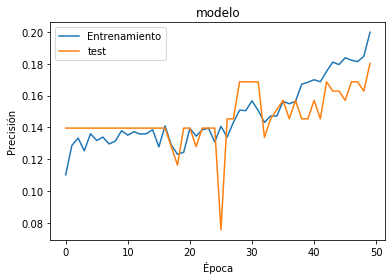

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#from pylab import rcParams
#sns.set(style='whitegrid', palette='muted', font_scale=1.5)
#rcPatams['figure.figsize']=12, 5
print(model.summary())
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'test'],loc='upper left')

In [179]:
model = construirModelo(VOCABULARIO)
model.load_weights(FICHERO_PESOS)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


In [180]:
#LONGITUD_SALIDA=100
import ipywidgets as widgets
#from IPython.display import clear_output

def submit(longitudSalida=200, aleatorio=True, limpiar=True, sinEntrada=False,poximidad=0.07):
    textoOriginal = []
    prediccion = []
    if(len(text.value)>0):
        text.value+=chr(10)
    listaTextoCompleto = list(text.value)
    if(len(listaTextoCompleto)<LONGITUD):
        listaCaracteresSinProcesar = [' ' for i in range(LONGITUD-len(listaTextoCompleto))]+listaTextoCompleto[:len(listaTextoCompleto)]
    else:
        indice=len(listaTextoCompleto)-LONGITUD
        listaCaracteresSinProcesar = listaTextoCompleto[indice:indice+LONGITUD]
    
    textoProcesado = ""    
    textoCompleto = text.value    
    #palabraSinProcesar.append(' ')
    
    textoAnterior = []#[caracteres.index(c) for c in textoProcesado]
    ultimoTexto = [caracteres.index(c) for c in listaCaracteresSinProcesar]
    
    #Alimentamos la red con toda la entrada anterior
    #TODO
    
    
    #numero=[]
    salida=[]
    probabilidades=[]
    caracteresPosibles=[]
    rng = np.random.default_rng()
    iCaracter=0
    terminar=False
    while(iCaracter<longitudSalida and not terminar):
        iCaracter+=1
        #X=np.array([ultimoTexto])
        X = np.reshape(ultimoTexto, (1, LONGITUD,1))
        caracteresPosibles = model.predict((X/float(VOCABULARIO)))

        prediccionesOrdenadas=(caracteresPosibles.argsort()[0])[::-1]
        candidatos=[]
        for i,pred in enumerate(prediccionesOrdenadas):
            if((caracteresPosibles[0][prediccionesOrdenadas[0]]-caracteresPosibles[0][pred])<poximidad):
                candidatos.append(pred)
        candidato=rng.integers(len(candidatos))
        #print(len(candidatos))
        siguienteCaracter=candidatos[(candidato if aleatorio else 0)]
        #probabilidades.append({"letra":caracteres[siguienteCaracter],"probabilidad":caracteresPosibles[0][siguienteCaracter]})
        probabilidades.append(caracteresPosibles[0][siguienteCaracter])
        ultimoTexto.append(siguienteCaracter)
        salida.append(siguienteCaracter)
        ultimoTexto = ultimoTexto[1:]
        #numero.append(str(siguienteCaracter))
        if(siguienteCaracter==1):
            terminar=True
        
    #
    if limpiar:
        pronostico.clear_output()
    with pronostico:
        print( (text.value if not sinEntrada else "")+""+''.join(caracteres[c] for c in salida )+"")
        #print("#"*20)
        #print(probabilidades)
        print("-"*20)
    
    #display(text)
    #text.focus_set()

In [183]:
pronostico=widgets.Output()

text = widgets.Text(continuous_update=True)
#La Regenta
text.value="Esto que digo de visitar talleres ajenos"
#text.value="placer"
#text.value="La lista de contagios,"
text.value="Hola"#Hola"+chr(10)
display(text,pronostico)
submit(200, True)
#pronostico.outputs.print("-----------------")
submit(200, False,False)
#text.on_submit(submit())
#text.observe(submit)


Hola
   ee  e  ee eee e e  e     e  ee   e e eo  eee        e  e  ee    ee eeeeee ee e    aaee  ee  es aeeeeeee ee aee  e e  sse    eee  eae e  ee  aeee    es sie   ee eeaee  eeeee      e e   a eeeee e eoa
--------------------
Hola

                                                                                                                                                                                                        
--------------------
